3 practical applications of face detection technology in real life:
- Facial Recognition and Authentication: Face detection technology is widely used in facial recognition systems for authentication and access control. This application is employed in smartphones, laptops, and other devices for unlocking the device, authorizing transactions, and accessing secure information. It's also used in security systems for identity verification at airports, border crossings, and high-security facilities.
- Smart Surveillance Systems: Face detection is a crucial component of smart surveillance systems used in public places, retail stores, and other environments. By detecting and tracking faces in real-time, these systems can monitor crowds, identify individuals of interest, and enhance security. They can also be used for analyzing customer demographics and behavior in retail environments to improve marketing strategies and optimize store layouts.
- Emotion Recognition and Human-Computer Interaction: Face detection technology is utilized in emotion recognition systems to analyze facial expressions and infer emotional states such as happiness, sadness, anger, and surprise. These systems have applications in various fields, including market research, customer feedback analysis, and mental health monitoring. Additionally, face detection is integral to human-computer interaction applications such as augmented reality (AR), virtual reality (VR), and gesture recognition, enabling natural and intuitive user interfaces.

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.models import Model

# Load the pre-trained ResNet50V2 model without the top classification layer
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add a new detection head for face detection
x = base_model.output
x = Conv2D(256, (3, 3), activation='relu')(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
output_bbox = Dense(4, activation='sigmoid', name='bounding_box')(x)  # Output for bounding box coordinates
output_confidence = Dense(1, activation='sigmoid', name='confidence')(x)  # Output for confidence score
model = Model(inputs=base_model.input, outputs=[output_bbox, output_confidence])

# Compile the model
model.compile(optimizer='adam', loss={'bounding_box': 'mse', 'confidence': 'binary_crossentropy'})

# Display model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 29,923,589 (114.15 MB)

 Trainable params: 6,358,789 (24.26 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

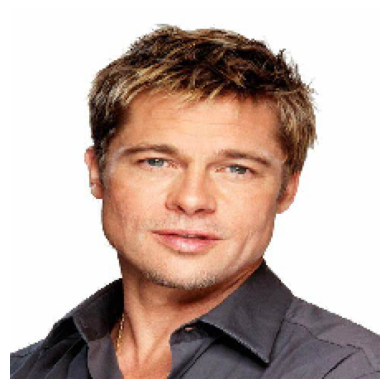

img_preprocessed shape: (1, 224, 224, 3)


In [7]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img_path = 'Dataset/bradpitt.jpeg'
img = image.load_img(img_path, target_size=(224, 224))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions to match the model input shape
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image using ResNet preprocess_input
img_preprocessed = preprocess_input(img_array)

print("img_preprocessed shape:", img_preprocessed.shape)


In [8]:
# Use the model to make predictions
bbox_pred, confidence_pred = model.predict(img_preprocessed)

# Display the predicted bounding box coordinates and confidence score
print("Predicted bounding box coordinates:", bbox_pred)
print("Predicted confidence score:", confidence_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted bounding box coordinates: [[0.3567411 0.2057093 0.8351623 0.2212017]]
Predicted confidence score: [[0.8941014]]


# this represents xmin (top-left x coordinate of corner of bounding box), ymin (top-left y coordinate of corner of bounding box), xmax (bottom-right), y-max (bottom-right); predicted confidence score is high and indicates the model's confidence that a face is present in the bounding box

let's try on image of multiple faces

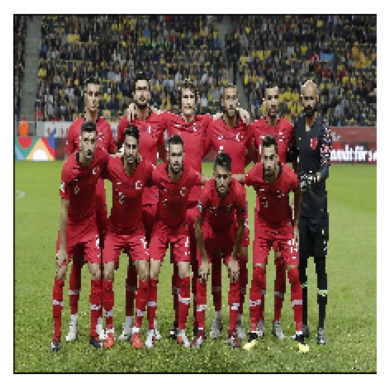

img_preprocessed shape: (1, 224, 224, 3)


In [12]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img_path = 'Dataset/sportsteam.png'
img = image.load_img(img_path, target_size=(224, 224))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions to match the model input shape
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image using ResNet preprocess_input
img_preprocessed = preprocess_input(img_array)

print("img_preprocessed shape:", img_preprocessed.shape)

In [13]:
# Use the model to make predictions
bbox_pred, confidence_pred = model.predict(img_preprocessed)

# Display the predicted bounding box coordinates and confidence score
print("Predicted bounding box coordinates:", bbox_pred)
print("Predicted confidence score:", confidence_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted bounding box coordinates: [[0.13396204 0.02946709 0.524232   0.00288429]]
Predicted confidence score: [[0.2983986]]


I get differing confident scores, sometimes very high and sometimes very low. Let's use a couple more images

2024-04-19 19:35:10.932497: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


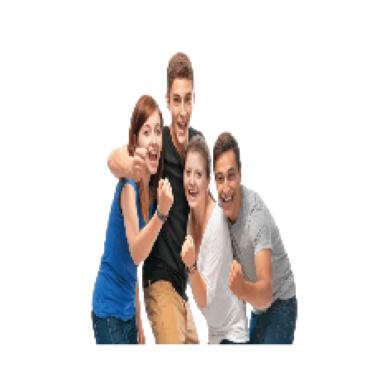

img_preprocessed shape: (1, 224, 224, 3)


In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img_path = 'Dataset/people_eyes.png'
img = image.load_img(img_path, target_size=(224, 224))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions to match the model input shape
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image using ResNet preprocess_input
img_preprocessed = preprocess_input(img_array)

print("img_preprocessed shape:", img_preprocessed.shape)


In [5]:
# Use the model to make predictions
bbox_pred, confidence_pred = model.predict(img_preprocessed)

# Display the predicted bounding box coordinates and confidence score
print("Predicted bounding box coordinates:", bbox_pred)
print("Predicted confidence score:", confidence_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted bounding box coordinates: [[0.01713524 0.30746502 0.71260744 0.3188903 ]]
Predicted confidence score: [[0.7129953]]


In [6]:
## let's try to annotate:
import cv2

# Load the original image again (assuming you have it loaded)
img = cv2.imread('Dataset/people_eyes.png')
original_height, original_width = img.shape[:2]

# Get normalized bounding box coordinates
bbox_xmin, bbox_ymin, bbox_xmax, bbox_ymax = bbox_pred[0]

# Convert normalized bounding box coordinates to pixel coordinates
xmin = int(bbox_xmin * original_width)
ymin = int(bbox_ymin * original_height)
xmax = int(bbox_xmax * original_width)
ymax = int(bbox_ymax * original_height)

# Draw the bounding box on the original image
cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

# Display the image with the bounding box and confidence score
cv2.putText(img, f"Confidence: {confidence_pred[0][0]:.2f}", (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
cv2.imshow('Face Detection', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

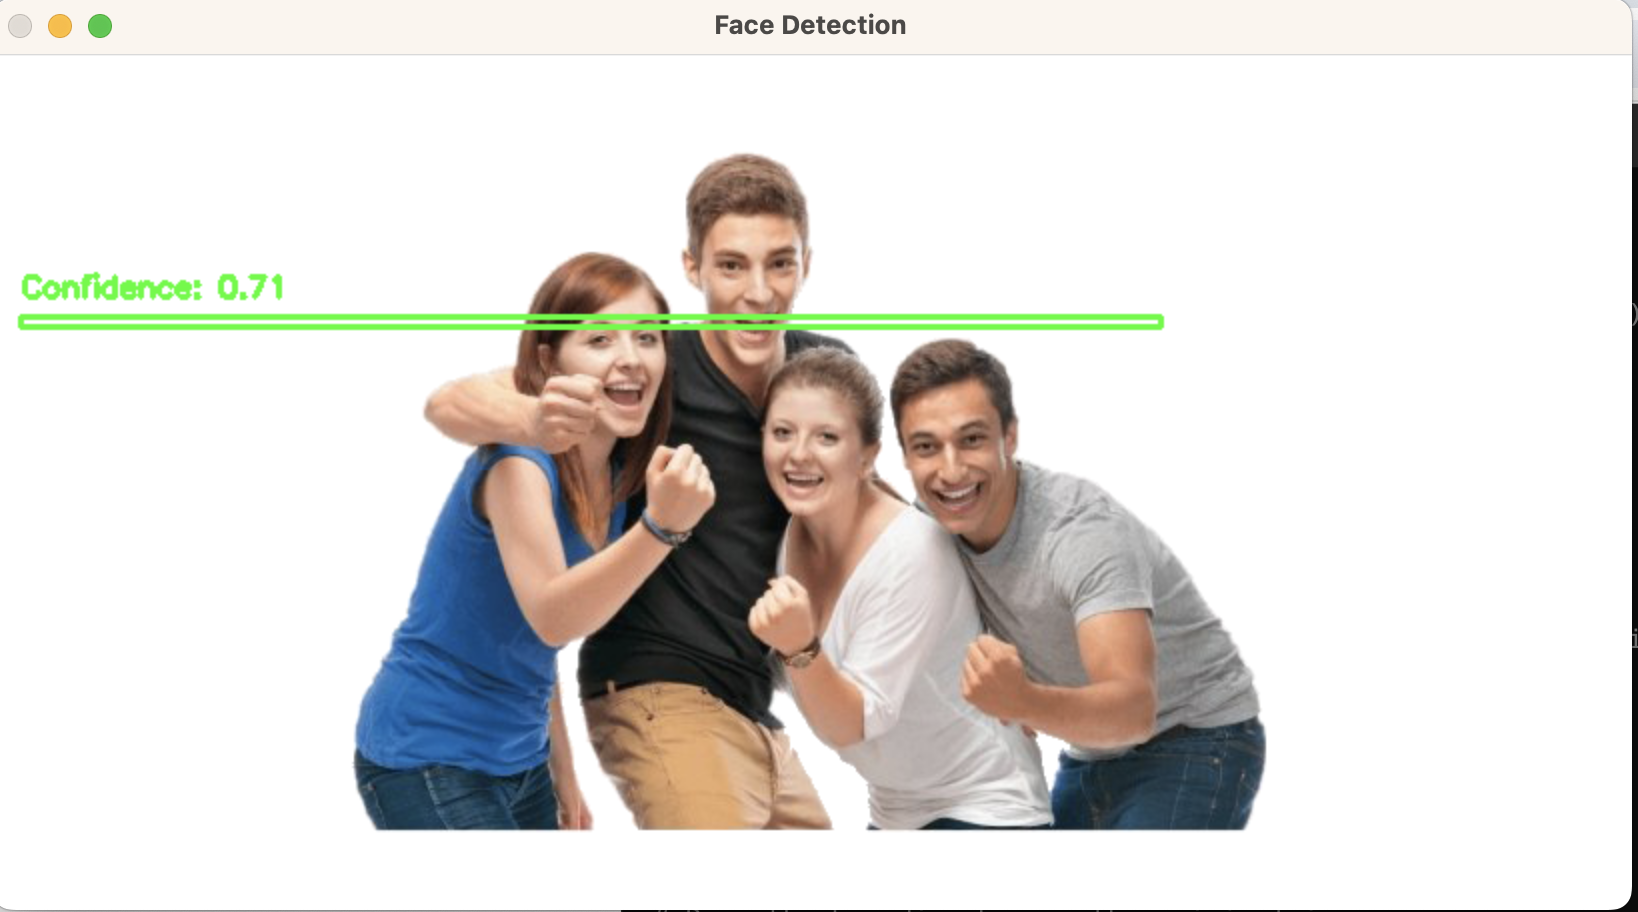

I want to try this on something harder. Let's use another image

2024-04-19 19:47:28.412011: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


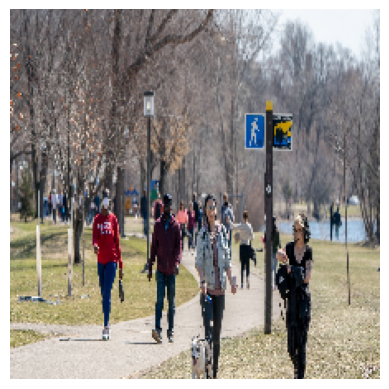

img_preprocessed shape: (1, 224, 224, 3)


In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np

# Load the image
img_path = 'Dataset/hardpicture.jpeg'
img = image.load_img(img_path, target_size=(224, 224))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions to match the model input shape
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image using ResNet preprocess_input
img_preprocessed = preprocess_input(img_array)

print("img_preprocessed shape:", img_preprocessed.shape)


In [4]:
# Use the model to make predictions
bbox_pred, confidence_pred = model.predict(img_preprocessed)

# Display the predicted bounding box coordinates and confidence score
print("Predicted bounding box coordinates:", bbox_pred)
print("Predicted confidence score:", confidence_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted bounding box coordinates: [[0.18277217 0.33938405 0.5893307  0.98518234]]
Predicted confidence score: [[0.6356072]]


In [5]:
## let's try to annotate:
import cv2

# Load the original image again (assuming you have it loaded)
img = cv2.imread('Dataset/hardpicture.jpeg')
original_height, original_width = img.shape[:2]

# Get normalized bounding box coordinates
bbox_xmin, bbox_ymin, bbox_xmax, bbox_ymax = bbox_pred[0]

# Convert normalized bounding box coordinates to pixel coordinates
xmin = int(bbox_xmin * original_width)
ymin = int(bbox_ymin * original_height)
xmax = int(bbox_xmax * original_width)
ymax = int(bbox_ymax * original_height)

# Draw the bounding box on the original image
cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

# Display the image with the bounding box and confidence score
cv2.putText(img, f"Confidence: {confidence_pred[0][0]:.2f}", (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
cv2.imshow('Face Detection', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

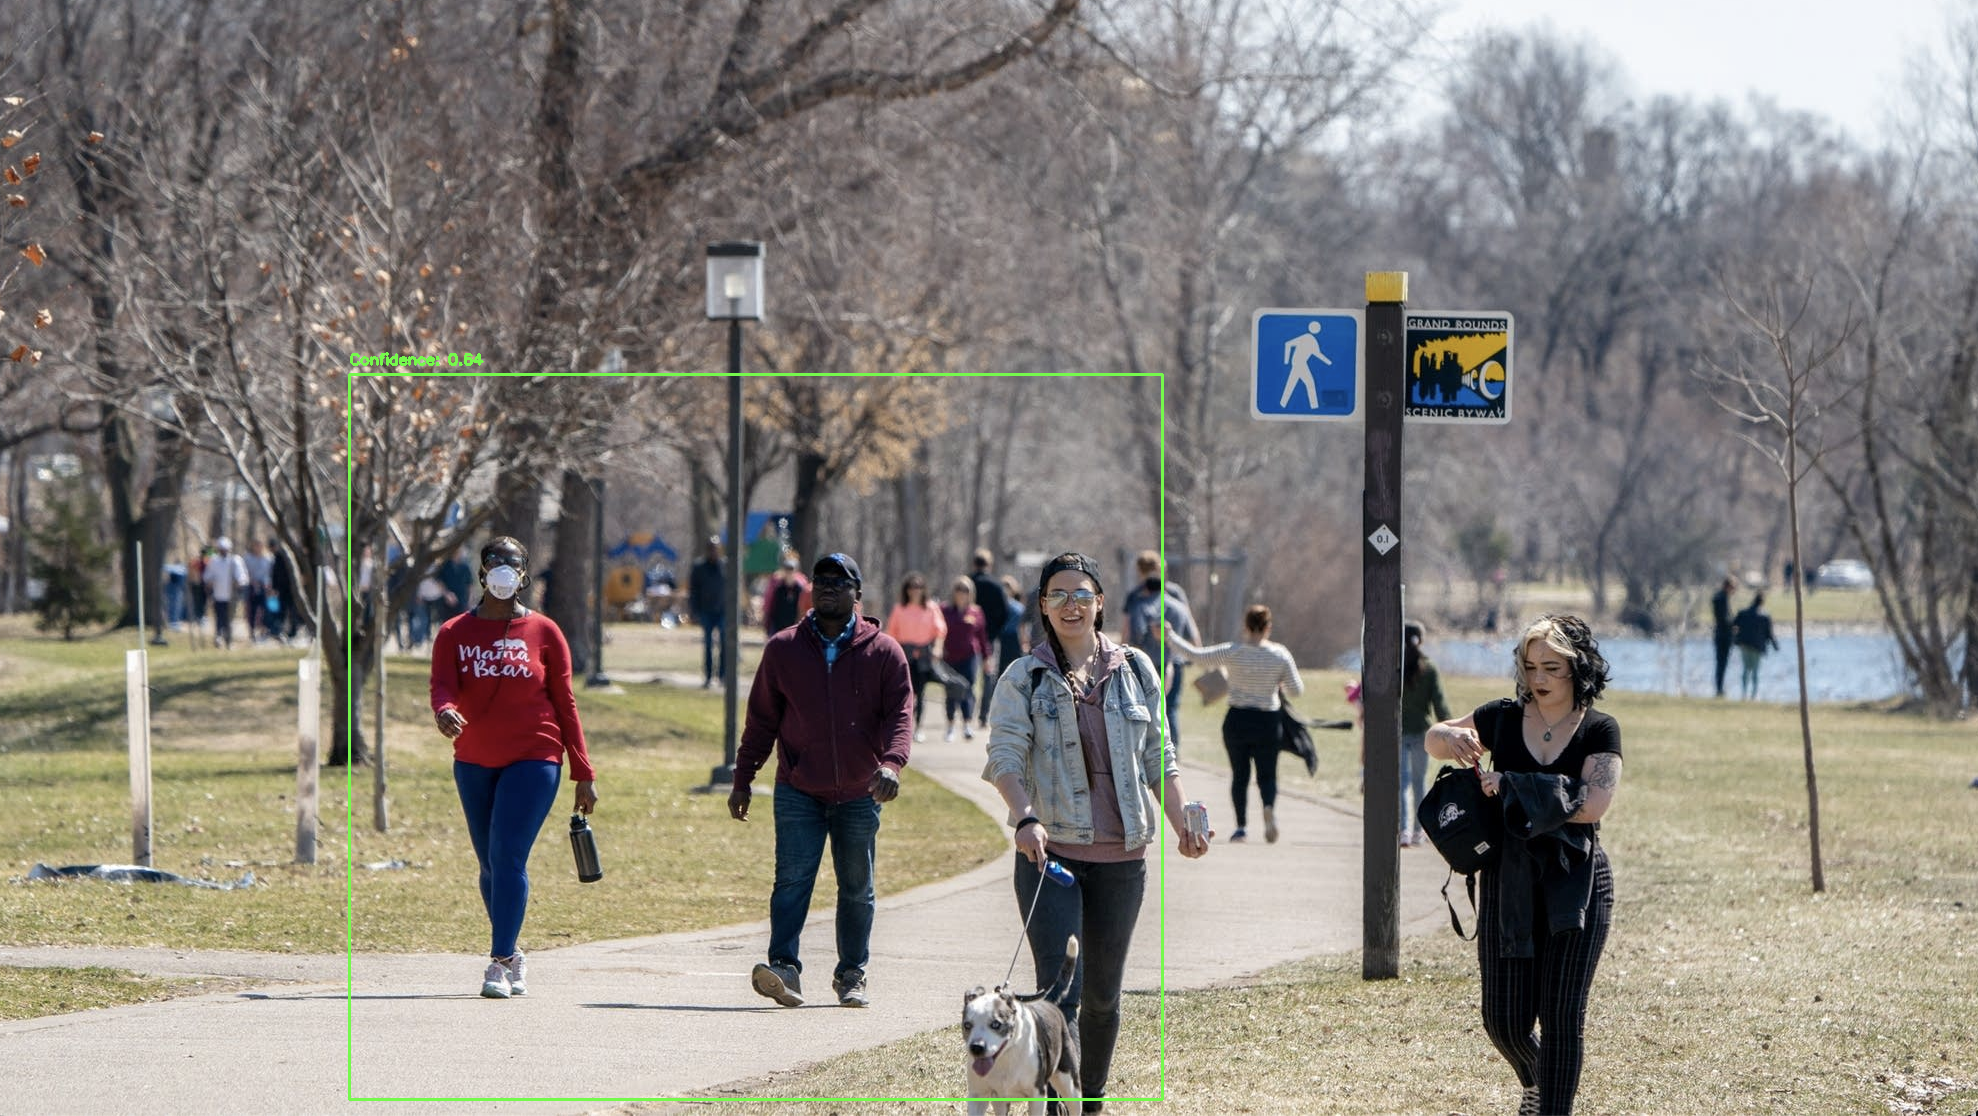

Still works well even when harder to see faces